# Label propagation 예제

In [37]:
from sklearn.datasets import make_classification

In [38]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)

In [41]:
print(X.shape)
y.shape

(1000, 2)


(1000,)

In [46]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

In [52]:
X_train.shape

(500, 2)

In [48]:
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train,
                                test_size=0.50, random_state=1, stratify=y_train)

In [53]:
print('Labeled Train Set:', X_train_lab.shape, y_train_lab.shape)
print('Unlabeled Train Set:', X_test_unlab.shape, y_test_unlab.shape)
# summarize test set size
print('Test Set:', X_test.shape, y_test.shape)

Labeled Train Set: (250, 2) (250,)
Unlabeled Train Set: (250, 2) (250,)
Test Set: (500, 2) (500,)


In [85]:
X_test.shape

(500, 2)

## X, y -> train X train y -> train_unlab_x, train_unlab_y

In [55]:
# 우선, label propagation 진행 안했을 때, Logistic regression 모델의 성능을 보고,
# label propagation 을 했을 때의 모델의 성능을 비교해보자
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_lab, y_train_lab)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print("label propagation X 로지스틱 성능 : {0}".format(accuracy))

label propagation X 로지스틱 성능 : 0.828


In [59]:
# 
from numpy import concatenate
X_train_mixed = concatenate((X_train_lab, X_test_unlab))

In [62]:
X_train_mixed

array([[-8.04413635e-01, -1.49485955e+00],
       [-1.28259485e+00,  1.84858207e+00],
       [ 1.52323450e+00, -3.94458262e-01],
       [ 6.05007914e-01,  5.13403753e-01],
       [ 1.04604379e-01, -1.83746104e+00],
       [ 8.31577857e-01,  6.93152321e-02],
       [ 1.36777286e+00,  4.63696116e+00],
       [-1.15071447e+00,  5.73359212e-01],
       [-1.60686181e+00, -1.66797765e+00],
       [ 1.09139446e+00, -9.93991759e-01],
       [ 2.18875780e+00,  5.84238966e-01],
       [ 5.00024341e-01, -6.22916776e-01],
       [-8.72943060e-01, -1.68607008e+00],
       [-1.24600691e+00,  1.19857810e+00],
       [-2.86722230e+00,  2.20036763e+00],
       [ 1.39549289e+00, -2.04279725e-01],
       [-1.90989451e+00, -5.21016336e-01],
       [-2.79468470e+00, -1.16270130e+00],
       [-4.98169041e-01,  3.22374950e-01],
       [-3.95530395e-01,  3.14709613e-01],
       [-1.49607792e+00,  1.31529441e+00],
       [-8.63081102e-01, -9.15333223e-01],
       [-9.23831329e-01, -1.16463396e+00],
       [-1.

In [63]:
nolabel = [-1 for _ in range(len(y_test_unlab))]

In [66]:
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

In [89]:
len(y_train_mixed)

500

In [69]:
from sklearn.semi_supervised import LabelPropagation
model_ = LabelPropagation()

model_.fit(X_train_mixed, y_train_mixed)

yhat_ = model_.predict(X_test)

accuracy_ = accuracy_score(y_test, yhat_)
print("Label propagation 후 기존 라벨 값과의 비교 값 정확도 : {0}".format(accuracy_))

Label propagation 후 기존 라벨 값과의 비교 값 정확도 : 0.834


In [76]:
len(nolabel)

250

In [71]:
'''
transduction 은 label propation 해서 unlabel -> label 로 바뀌어진 nolabel 에 대한
예측 데이터 셋이다.
'''
tran_labels = model_.transduction_

In [95]:
y_train_mixed[:500]

array([ 0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,
        1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  1,
        1,  0,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  1,  1,
        1,  1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,  0,
        1,  0,  0,  1,  0,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0,
        1,  0,  1,  1,  0

In [97]:
tran_labels

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,

In [79]:
model

LogisticRegression()

In [80]:
model2 = LogisticRegression()

In [81]:
print(X_train_mixed.shape)
print(y_train_mixed.shape)

(500, 2)
(500,)


In [88]:
len(tran_labels)

500

In [83]:
model2.fit(X_train_mixed, tran_labels)

LogisticRegression()

In [84]:
yhat2 = model2.predict(X_test)
score = accuracy_score(y_test, yhat2)
print("label propagation 으로 예측 한 값으로 train 시키고 로지스틱을 돌린 정확도 : {0}"
      .format(score) )

label propagation 으로 예측 한 값으로 train 시키고 로지스틱을 돌린 정확도 : 0.836


# 정리 

## SV10 Label propagation 방법

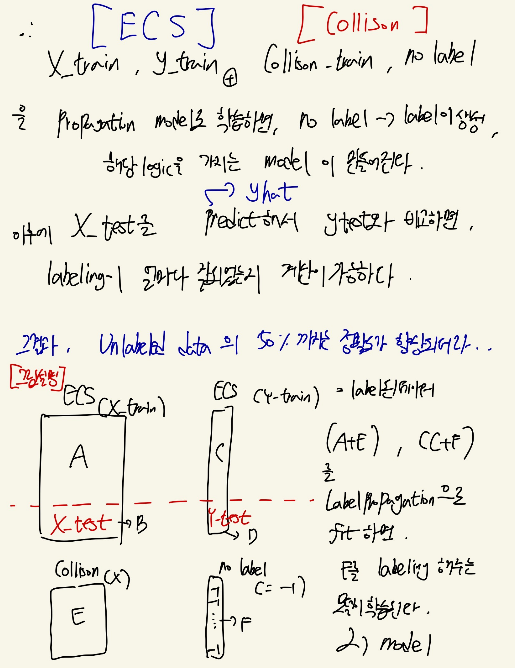


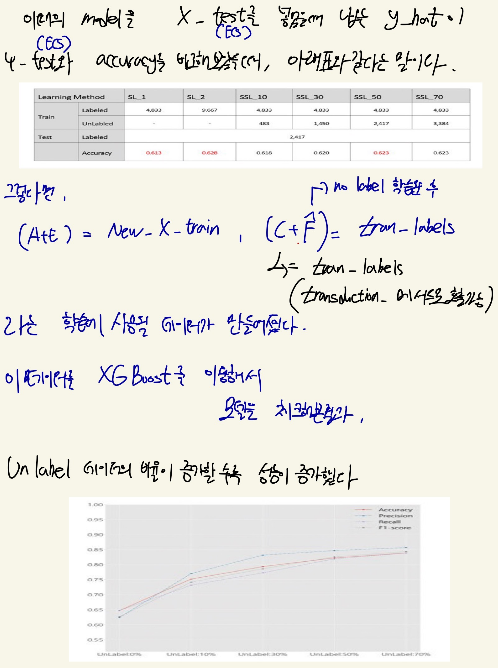

## 이렇게 준지도 학습 기법인 label propagation을 사용하여 unlabel 데이터를  labeling 시켜주어서 labeling 된 학습 데이터를 늘리고 SMOTE 를 사용해 클래스 불균형 문제를 해소 했다. 이후, XGBoost classifier 지도 학습 모델을 최종적으로 사용하여 성능을 평가하였다.


## 성능 결과, 준지도 학습은 label 데이터가 부족한 상황의 대안점이 될 수 있다는 사실을 입증 했다.

## label propagation은 고차원 데이터에 적합하지 않고 연산량이 증가한다는 한계점이 존재한다.
## 따라서, Tabular 데이터에 알맞은 준지도 학습 딥러닝 기법인 TabnetPretrainer를 사용 하여 label propagation 과 비교 해보자